In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation


In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key,path in zip(data_name_list, dataset_list)}

In [3]:
order = data['order_items'].groupby('order_id')['price'].sum().to_frame().reset_index()
order.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [4]:
order_2 = order.merge(
    data['orders'],
    on ='order_id',
    how='left')[
    ['order_id',
     'price',
     'freight_value',
     'customer_id',
     'order_delivered_customer_date',
       ]]

# Prix = prix + fret

In [22]:
data['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [5]:
data['order_items']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
order_3 = order_2.merge(data['customers'][['customer_id','customer_unique_id']],on='customer_id',how='left')
order_3.head()

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5


In [7]:
review_2 =  data['order_reviews'].groupby('order_id')['review_score'].mean().to_frame().reset_index()
review_2.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [8]:
order_4 = order_3.merge(review_2,on='order_id', how='left')
order_4.head()

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,5.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,4.0
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,5.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,5.0


# RFM

In [10]:
order_4['order_delivered_customer_date'] = pd.to_datetime(order_4['order_delivered_customer_date']).astype('datetime64[D]')

order_4['nb_days'] = (datetime.now() - order_4['order_delivered_customer_date']).astype('timedelta64[D]')

In [11]:
order_4

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score,nb_days
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,2017-09-20,871766c5855e863f6eccc05f988b23cb,5.0,2055.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12,eb28e67c4c0b83846050ddfb8a35d051,4.0,2186.0
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22,3818d81c6709e39d06b2738a8d3a2474,5.0,1931.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14,af861d436cfc08b2c2ddefd0ba074622,4.0,1727.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01,64b576fb70d441e8f1b2d7d446e483c5,5.0,2258.0
...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,b51593916b4b8e0d6f66f2ae24f2673d,2018-05-10,0c9aeda10a71f369396d0c04dce13a64,5.0,1823.0
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,84c5d4fbaf120aae381fad077416eaa0,2018-07-23,0da9fe112eae0c74d3ba1fe16de0988b,5.0,1749.0
98663,fffce4705a9662cd70adb13d4a31832d,99.90,29309aa813182aaddc9b259e31b870e6,2017-10-28,cd79b407828f02fdbba457111c38e4c4,5.0,2017.0
98664,fffe18544ffabc95dfada21779c9644f,55.99,b5e6afd5a41800fdf401e0272ca74655,2017-08-16,eb803377c9315b564bdedad672039306,5.0,2090.0


In [32]:
rfm = order_4.groupby('customer_unique_id').agg({'nb_days' : np.min, 
                                      'order_delivered_customer_date' : len,
                                      'price' : np.sum,
                                      'review_score'  : np.mean    
                                     }).reset_index()

rfm = rfm.rename(columns={'nb_days' : 'r', # récence
            'order_delivered_customer_date' : 'f', # fréquence
            'price' : 'm' }) # montant
rfm

,customer_unique_id,r,f,m,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1817.0,1,129.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1823.0,1,18.90,4.0
2,0000f46a3911fa3c0805444483337064,2223.0,1,69.00,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2013.0,1,25.99,4.0
4,0004aac84e0df4da2b147fca70cf8255,1987.0,1,180.00,5.0
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2131.0,1,1570.00,5.0
95416,fffea47cd6d3cc0a88bd621562a9d061,1944.0,1,64.89,4.0
95417,ffff371b4d645b6ecea244b27531430a,2265.0,1,89.90,5.0
95418,ffff5962728ec6157033ef9805bacc48,1819.0,1,115.00,5.0


In [13]:
rfm.isna().mean()

customer_unique_id    0.000000
r                     0.021631
f                     0.000000
m                     0.000000
review_score          0.007326
dtype: float64

In [14]:
rfm = rfm.dropna()

# Imputation mode ?

In [ ]:
# imputation_mode = rfm.mode()
# rfm = rfm.fillna(imputation_mode)

In [15]:
rfm.isna().mean()

customer_unique_id    0.0
r                     0.0
f                     0.0
m                     0.0
review_score          0.0
dtype: float64

In [18]:
# Score par quantile
rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')

rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')

rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2'])#.astype('str')

#rfm =  rfm.dropna()

rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')

# rfm['rq'] = rfm['rq'].astype('str')
# rfm['fq'] = rfm['fq'].astype('str')
# rfm['mq'] = rfm['mq'].astype('str')


rfm['log_r'] = np.log(rfm.r)
rfm['log_f'] = np.log(rfm.f)
rfm['log_m'] = np.log(rfm.m)


# Score composite
rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']

rfm

C:\Users\Hankour\AppData\Local\Temp\ipykernel_81540\3443404805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')
C:\Users\Hankour\AppData\Local\Temp\ipykernel_81540\3443404805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')
C:\Users\Hankour\AppData\Local\Temp\ipykernel_81540\3443404805.py:6: SettingWithCopyWarning: 

,customer_unique_id,r,f,m,review_score,rq,fq,mq,score,log_r,log_f,log_m
0,0000366f3b9a7992bf8c76cfdf3221e2,1817.0,1,129.90,5.0,2,0,2,202,7.504942,0.0,4.866765
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1823.0,1,18.90,4.0,2,0,0,200,7.508239,0.0,2.939162
2,0000f46a3911fa3c0805444483337064,2223.0,1,69.00,3.0,0,0,1,001,7.706613,0.0,4.234107
3,0000f6ccb0745a6a4b88665a16c9f078,2013.0,1,25.99,4.0,0,0,0,000,7.607381,0.0,3.257712
4,0004aac84e0df4da2b147fca70cf8255,1987.0,1,180.00,5.0,0,0,2,002,7.594381,0.0,5.192957
...,...,...,...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2131.0,1,1570.00,5.0,0,0,2,002,7.664347,0.0,7.358831
95416,fffea47cd6d3cc0a88bd621562a9d061,1944.0,1,64.89,4.0,1,0,1,101,7.572503,0.0,4.172694
95417,ffff371b4d645b6ecea244b27531430a,2265.0,1,89.90,5.0,0,0,1,001,7.725330,0.0,4.498698
95418,ffff5962728ec6157033ef9805bacc48,1819.0,1,115.00,5.0,2,0,1,201,7.506042,0.0,4.744932


In [19]:
rfm.describe()

,r,f,m,review_score,log_r,log_f,log_m
count,92753.000000,92753.000000,92753.000000,92753.000000,92753.000000,92753.000000,92753.000000
mean,1936.859940,1.034824,141.574397,4.152640,7.565803,0.022933,4.468726
std,151.935357,0.213795,215.066240,1.280411,0.077392,0.130455,0.937744
min,1663.000000,1.000000,0.850000,1.000000,7.416378,0.000000,-0.162519
25%,1816.000000,1.000000,47.700000,4.000000,7.504392,0.000000,3.864931
50%,1916.000000,1.000000,89.770000,5.000000,7.557995,0.000000,4.497251
75%,2046.000000,1.000000,154.800000,5.000000,7.623642,0.000000,5.042134
max,2399.000000,16.000000,13440.000000,5.000000,7.782807,2.772589,9.505991


# Fonction RFM

In [29]:
def fonction_rfm (data):
    
    rfm = data.groupby('customer_unique_id').agg({'nb_days' : np.min, # minimum soit le dernier achat 
                                      'order_delivered_customer_date' : len, # fréquence
                                      'price' : np.sum, # Somme des montants des achats
                                      'review_score'  : np.mean    # Moyenne des notes clients
                                     }).reset_index()

    rfm = rfm.rename(columns={'nb_days' : 'r', # récence
            'order_delivered_customer_date' : 'f', # fréquence
            'price' : 'm' }) # montant
    
    rfm = rfm.dropna() # Suppression des NA
    
    # Score par quantile
    rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')

    rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')

    rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2'])#.astype('str')

    # Format string pour les sommer 

    rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')

    # rfm['rq'] = rfm['rq'].astype('str')
    # rfm['fq'] = rfm['fq'].astype('str')
    # rfm['mq'] = rfm['mq'].astype('str')

    # Passage en log 
    rfm['log_r'] = np.log(rfm.r)
    rfm['log_f'] = np.log(rfm.f)
    rfm['log_m'] = np.log(rfm.m)


    # Score composite
    rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']
    
    
    return rfm
    

In [36]:
# Test fonction rfm
rfm = fonction_rfm(order_4)
rfm

,customer_unique_id,r,f,m,review_score,rq,fq,mq,log_r,log_f,log_m,score
0,0000366f3b9a7992bf8c76cfdf3221e2,1817.0,1,129.90,5.0,2,0,2,7.504942,0.0,4.866765,202
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1823.0,1,18.90,4.0,2,0,0,7.508239,0.0,2.939162,200
2,0000f46a3911fa3c0805444483337064,2223.0,1,69.00,3.0,0,0,1,7.706613,0.0,4.234107,001
3,0000f6ccb0745a6a4b88665a16c9f078,2013.0,1,25.99,4.0,0,0,0,7.607381,0.0,3.257712,000
4,0004aac84e0df4da2b147fca70cf8255,1987.0,1,180.00,5.0,0,0,2,7.594381,0.0,5.192957,002
...,...,...,...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2131.0,1,1570.00,5.0,0,0,2,7.664347,0.0,7.358831,002
95416,fffea47cd6d3cc0a88bd621562a9d061,1944.0,1,64.89,4.0,1,0,1,7.572503,0.0,4.172694,101
95417,ffff371b4d645b6ecea244b27531430a,2265.0,1,89.90,5.0,0,0,1,7.725330,0.0,4.498698,001
95418,ffff5962728ec6157033ef9805bacc48,1819.0,1,115.00,5.0,2,0,1,7.506042,0.0,4.744932,201


# Fonction K means

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

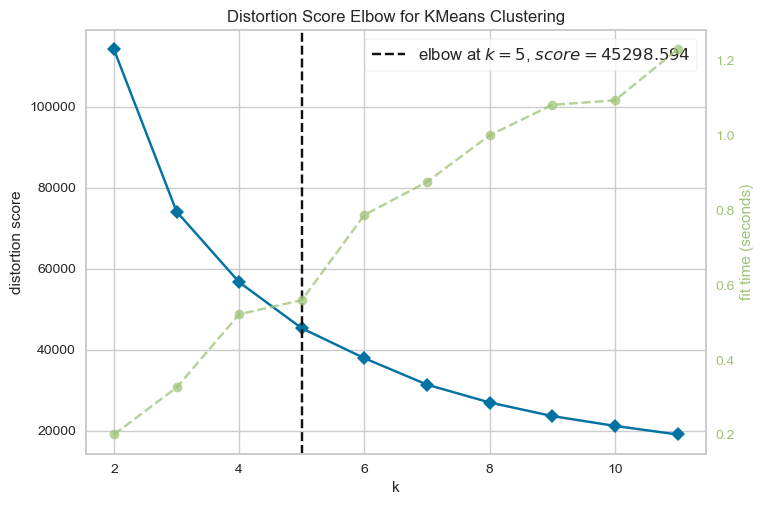

In [38]:
# Instantiate the clustering model and visualizer
model = KMeans()

X = np.array(rfm[['log_r','log_f','log_m','review_score']])

visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

In [47]:
def cluster_kmeans(rfm = rfm , k=5):
    
    # Features : la version log rfm
    X = np.array(rfm[['log_r','log_f','log_m','review_score']])
    
    # Model Kmeans défaut k = 5 
    model = KMeans(n_clusters = k, random_state=1990).fit(X)
    y_pred = model.predict(X)
    
    return y_pred 

In [48]:
y_pred  = cluster_kmeans(rfm,5)

In [49]:
rfm['cluster'] = y_pred

In [51]:
rfm['cluster'].value_counts()

3    29511
1    21062
4    18968
2    11777
0    11435
Name: cluster, dtype: int64

In [52]:
rfm

,customer_unique_id,r,f,m,review_score,rq,fq,mq,log_r,log_f,log_m,score,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1817.0,1,129.90,5.0,2,0,2,7.504942,0.0,4.866765,202,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1823.0,1,18.90,4.0,2,0,0,7.508239,0.0,2.939162,200,1
2,0000f46a3911fa3c0805444483337064,2223.0,1,69.00,3.0,0,0,1,7.706613,0.0,4.234107,001,4
3,0000f6ccb0745a6a4b88665a16c9f078,2013.0,1,25.99,4.0,0,0,0,7.607381,0.0,3.257712,000,1
4,0004aac84e0df4da2b147fca70cf8255,1987.0,1,180.00,5.0,0,0,2,7.594381,0.0,5.192957,002,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2131.0,1,1570.00,5.0,0,0,2,7.664347,0.0,7.358831,002,0
95416,fffea47cd6d3cc0a88bd621562a9d061,1944.0,1,64.89,4.0,1,0,1,7.572503,0.0,4.172694,101,4
95417,ffff371b4d645b6ecea244b27531430a,2265.0,1,89.90,5.0,0,0,1,7.725330,0.0,4.498698,001,3
95418,ffff5962728ec6157033ef9805bacc48,1819.0,1,115.00,5.0,2,0,1,7.506042,0.0,4.744932,201,3


# ARI

In [57]:
pd.date_range(start='2/2/2019', end='2/08/2020', freq = "M")


DatetimeIndex(['2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', freq='M')

In [61]:
df = order_4.copy()

df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'] )

In [66]:
print('Date de début : ',df['order_delivered_customer_date'].min()) 
print('Date de fin : ',df['order_delivered_customer_date'].max()) 

Date de début :  2016-10-11 00:00:00
Date de fin :  2018-10-17 00:00:00


## Baseline 
    1ère année comme référence 
    Teste ARI sur différentes périodes (mois) sur la deuxième année 

In [78]:
# 1ere année
start_date = pd.to_datetime('10/11/2016') # M J Y
end_date = pd.to_datetime('10/11/2017')


baseline = df.loc[(df['order_delivered_customer_date'] > start_date) &
                  (df['order_delivered_customer_date'] < end_date)].copy()

baseline.shape

(26227, 7)

In [79]:
# 2ème année

# Supérieur à date de fin (1ere année)
df.loc[(df['order_delivered_customer_date'] > end_date)]

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score,nb_days
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22,3818d81c6709e39d06b2738a8d3a2474,5.0,1931.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14,af861d436cfc08b2c2ddefd0ba074622,4.0,1727.0
6,00054e8431b9d7675808bcb819fb4a32,19.90,32e2e6ab09e778d99bf2e0ecd4898718,2017-12-18,635d9ac1680f03288e72ada3a1035803,4.0,1966.0
7,000576fe39319847cbb9d288c5617fa6,810.00,9ed5e522dd9dd85b4af4a077526d8117,2018-07-09,fda4476abb6307ab3c415b7e6d026526,5.0,1763.0
8,0005a1a1728c9d785b8e2b08b904576c,145.95,16150771dfd4776261284213b89c304e,2018-03-29,639d23421f5517f69d0c3d6e6564cf0e,1.0,1865.0
...,...,...,...,...,...,...,...
98660,fffbee3b5462987e66fb49b1c5411df2,119.85,11a0e041ea6e7e21856d2689b64e7f3a,2018-07-05,ecc3d4eb9b17d2f0865d21f2abecc51c,5.0,1767.0
98661,fffc94f6ce00a00581880bf54a75a037,299.99,b51593916b4b8e0d6f66f2ae24f2673d,2018-05-10,0c9aeda10a71f369396d0c04dce13a64,5.0,1823.0
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,84c5d4fbaf120aae381fad077416eaa0,2018-07-23,0da9fe112eae0c74d3ba1fe16de0988b,5.0,1749.0
98663,fffce4705a9662cd70adb13d4a31832d,99.90,29309aa813182aaddc9b259e31b870e6,2017-10-28,cd79b407828f02fdbba457111c38e4c4,5.0,2017.0


### Test 1 semaine
    Baseline prédict ==> s1

In [85]:
pd.date_range(start=end_date, freq = "W",periods = 1)[0]

Timestamp('2017-10-15 00:00:00', freq='W-SUN')

In [101]:
t1 = pd.to_datetime('10/18/2017')

s1 = df.loc[(df['order_delivered_customer_date'] > end_date) &
       (df['order_delivered_customer_date'] < t1)]

#s1

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score,nb_days
112,00471463a6106056c1a2a809f70de640,179.99,fcad74a7e0dff27c33e36cbd78280bf9,2017-10-12,1e57acebf9849b1d7af7c21c14c1b99f,5.0,2033.0
385,01094e169d4b14edaf6954eeddb83633,79.90,2b7ad3fc92af63027a7748b084f9b439,2017-10-17,d2787622df9fd933c164f7cf696a4e2a,5.0,2028.0
810,022790f69760d0a1c025cd3acdf13927,22.90,c2b5591d50732618e8245b7c01bda8cd,2017-10-16,083b54b120f24dd1d5ecb1c11322d043,5.0,2029.0
856,0245631f7bd55dbee7c6b441629bba94,849.60,4d82e79f5404e8c3f059ab099fbe5dda,2017-10-13,dd8c09f1b309c9ffc302c745550a9ff3,2.0,2032.0
882,0256530d814cde05587fcd8e1b992bc8,325.00,023d1d56f9187c91230a4e8b50ab6fb3,2017-10-16,d87cc9520e3fd47ef88f7098e51afe8a,5.0,2029.0
...,...,...,...,...,...,...,...
97827,fdc259a28a8f4ba4ea007b10244a8272,105.89,0dfb45e4e023f6d20188da2f6145a3ed,2017-10-16,edd0d266ff17dbbc60ee63eaa7cc4fb0,1.0,2029.0
97958,fe198069c03f548e40276d7c9d67c9a3,99.90,c8c67eae0994c44a07fe8cd2c5e54caf,2017-10-13,c37112c6cd4da4c6ecd37ad90e17b8c8,4.0,2032.0
98185,feb1bffbc0aa19c5d82a2d326737877d,19.90,667f26ced69e2ac1b07d7baabf2378c8,2017-10-16,0fc4eb5cd5c68c267d6fa1f8fbc9490e,2.0,2029.0
98341,ff16d15a9ee89f3b65af595178308532,19.90,7b47b0a45536529175e846fe1301117a,2017-10-17,f7e8590591bc95bf247598c854a2b599,5.0,2028.0


In [104]:
rfm_baseline = fonction_rfm(baseline)
rfm_s1 = fonction_rfm(s1)
#rfm['cluster'] = cluster_kmeans(rfm_baseline)
#rfm_baseline

In [98]:
cluster_kmeans(rfm_baseline)

array([4, 4, 3, ..., 2, 0, 0])

In [ ]:
def cluster_kmeans_predict(rfm = rfm , k=5, y):
    
    # Features : la version log rfm
    X = np.array(rfm[['log_r','log_f','log_m','review_score']])
    
    y = np.
    
    # Model Kmeans défaut k = 5 
    model = KMeans(n_clusters = k, random_state=1990).fit(X)
    y_pred = model.predict(X)
    
    return y_pred 

### Test mois

In [83]:
pd.date_range(start=end_date, freq = "M",periods = 12)

DatetimeIndex(['2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30'],
              dtype='datetime64[ns]', freq='M')